In [1]:
import os
import time

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
from PIL import Image

import math
import copy

from google.colab import drive
drive.mount('/content/drive')

device = torch.device('cuda:0')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/'My Drive'

/content/drive/My Drive


In [3]:
from sketch_J.jacobian import *
from sketch_J.utils import *

In [4]:
_,_, train_loader, test_loader = get_data(train_batch_size=500, test_batch_size=100)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
!pip install pytorchcv
import pytorchcv
from pytorchcv.model_provider import get_model as ptcv_get_model
thismodel = 'resnet20_cifar10'
model = ptcv_get_model(thismodel, pretrained=False)


     |████████████████████████████████| 440kB 5.0MB/s 


In [6]:
model = model.to("cuda")

In [7]:
model

CIFARResNet(
  (features): Sequential(
    (init_block): ConvBlock(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activ): ReLU(inplace=True)
    )
    (stage1): Sequential(
      (unit1): ResUnit(
        (body): ResBlock(
          (conv1): ConvBlock(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (activ): ReLU(inplace=True)
          )
          (conv2): ConvBlock(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (activ): ReLU(inplace=True)
      )
      (unit2): ResUnit(
        (body): ResBlock(
          (co

In [8]:
train_acc = compute_acc(model, train_loader, device)        
print(f'train ACC: {train_acc:.2f}, seed: {0}')
        
test_acc = compute_acc(model, test_loader, device)        
print(f'Test ACC: {test_acc:.2f}')

train ACC: 10.00, seed: 0
Test ACC: 10.00


In [9]:
optimizer = torch.optim.SGD(model.parameters(), .01, momentum=0.9, weight_decay=0)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [50, 100, 150], gamma=0.1, last_epoch=-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Epoch: 001/200 | Batch 000/100 | Cost: 2.5942


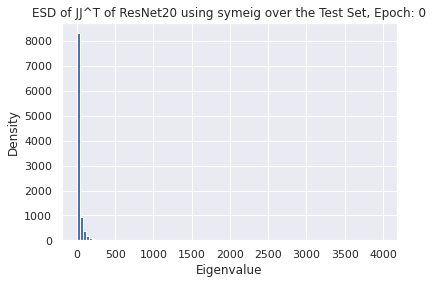

Epoch: 001/200
Train ACC: 34.67
Epoch: 002/200 | Batch 000/100 | Cost: 1.7023
Epoch: 002/200
Train ACC: 41.90
Epoch: 003/200 | Batch 000/100 | Cost: 1.5190
Epoch: 003/200
Train ACC: 46.69
Epoch: 004/200 | Batch 000/100 | Cost: 1.3290
Epoch: 004/200
Train ACC: 53.63
Epoch: 005/200 | Batch 000/100 | Cost: 1.2281
Epoch: 005/200
Train ACC: 56.84
Epoch: 006/200 | Batch 000/100 | Cost: 1.1382
Epoch: 006/200
Train ACC: 60.19
Epoch: 007/200 | Batch 000/100 | Cost: 1.0832
Epoch: 007/200
Train ACC: 62.70
Epoch: 008/200 | Batch 000/100 | Cost: 1.0195
Epoch: 008/200
Train ACC: 64.17
Epoch: 009/200 | Batch 000/100 | Cost: 0.9772
Epoch: 009/200
Train ACC: 65.05
Epoch: 010/200 | Batch 000/100 | Cost: 0.9624
Epoch: 010/200
Train ACC: 67.89
Epoch: 011/200 | Batch 000/100 | Cost: 0.8948


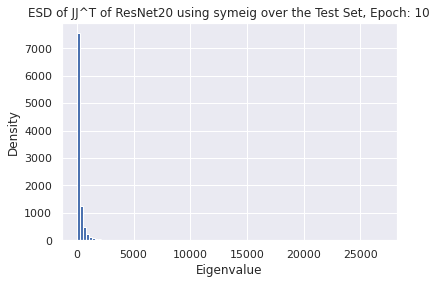

Epoch: 011/200
Train ACC: 68.82
Epoch: 012/200 | Batch 000/100 | Cost: 0.8537
Epoch: 012/200
Train ACC: 70.84
Epoch: 013/200 | Batch 000/100 | Cost: 0.7897
Epoch: 013/200
Train ACC: 70.71
Epoch: 014/200 | Batch 000/100 | Cost: 0.7733
Epoch: 014/200
Train ACC: 71.40
Epoch: 015/200 | Batch 000/100 | Cost: 0.7326
Epoch: 015/200
Train ACC: 70.22
Epoch: 016/200 | Batch 000/100 | Cost: 0.7015
Epoch: 016/200
Train ACC: 69.49
Epoch: 017/200 | Batch 000/100 | Cost: 0.6654
Epoch: 017/200
Train ACC: 68.98
Epoch: 018/200 | Batch 000/100 | Cost: 0.6265
Epoch: 018/200
Train ACC: 71.71
Epoch: 019/200 | Batch 000/100 | Cost: 0.6007
Epoch: 019/200
Train ACC: 74.19
Epoch: 020/200 | Batch 000/100 | Cost: 0.5497
Epoch: 020/200
Train ACC: 72.06
Epoch: 021/200 | Batch 000/100 | Cost: 0.5171


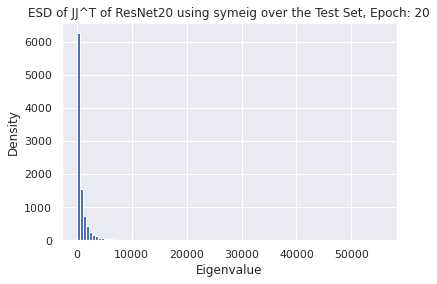

Epoch: 021/200
Train ACC: 72.84
Epoch: 022/200 | Batch 000/100 | Cost: 0.4852
Epoch: 022/200
Train ACC: 72.83
Epoch: 023/200 | Batch 000/100 | Cost: 0.4818
Epoch: 023/200
Train ACC: 69.32
Epoch: 024/200 | Batch 000/100 | Cost: 0.4543
Epoch: 024/200
Train ACC: 72.33
Epoch: 025/200 | Batch 000/100 | Cost: 0.4670
Epoch: 025/200
Train ACC: 72.21
Epoch: 026/200 | Batch 000/100 | Cost: 0.4205
Epoch: 026/200
Train ACC: 72.46
Epoch: 027/200 | Batch 000/100 | Cost: 0.3723
Epoch: 027/200
Train ACC: 67.86
Epoch: 028/200 | Batch 000/100 | Cost: 0.3880
Epoch: 028/200
Train ACC: 67.18
Epoch: 029/200 | Batch 000/100 | Cost: 0.4355
Epoch: 029/200
Train ACC: 71.97
Epoch: 030/200 | Batch 000/100 | Cost: 0.3619
Epoch: 030/200
Train ACC: 75.99
Epoch: 031/200 | Batch 000/100 | Cost: 0.3489


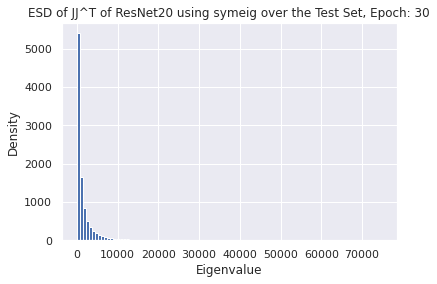

Epoch: 031/200
Train ACC: 71.42
Epoch: 032/200 | Batch 000/100 | Cost: 0.3535
Epoch: 032/200
Train ACC: 72.97
Epoch: 033/200 | Batch 000/100 | Cost: 0.3782
Epoch: 033/200
Train ACC: 73.40
Epoch: 034/200 | Batch 000/100 | Cost: 0.3971
Epoch: 034/200
Train ACC: 78.92
Epoch: 035/200 | Batch 000/100 | Cost: 0.2734
Epoch: 035/200
Train ACC: 72.48
Epoch: 036/200 | Batch 000/100 | Cost: 0.2687
Epoch: 036/200
Train ACC: 66.94
Epoch: 037/200 | Batch 000/100 | Cost: 0.3078
Epoch: 037/200
Train ACC: 71.82
Epoch: 038/200 | Batch 000/100 | Cost: 0.1971
Epoch: 038/200
Train ACC: 74.35
Epoch: 039/200 | Batch 000/100 | Cost: 0.2083
Epoch: 039/200
Train ACC: 73.15
Epoch: 040/200 | Batch 000/100 | Cost: 0.1721
Epoch: 040/200
Train ACC: 77.16
Epoch: 041/200 | Batch 000/100 | Cost: 0.1797


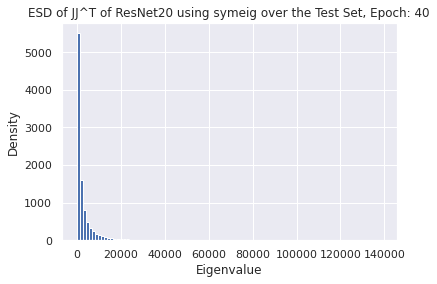

Epoch: 041/200
Train ACC: 78.82
Epoch: 042/200 | Batch 000/100 | Cost: 0.1625
Epoch: 042/200
Train ACC: 78.78
Epoch: 043/200 | Batch 000/100 | Cost: 0.1213
Epoch: 043/200
Train ACC: 80.18
Epoch: 044/200 | Batch 000/100 | Cost: 0.1653
Epoch: 044/200
Train ACC: 84.21
Epoch: 045/200 | Batch 000/100 | Cost: 0.1699
Epoch: 045/200
Train ACC: 81.65
Epoch: 046/200 | Batch 000/100 | Cost: 0.1628
Epoch: 046/200
Train ACC: 85.90
Epoch: 047/200 | Batch 000/100 | Cost: 0.1330
Epoch: 047/200
Train ACC: 84.06
Epoch: 048/200 | Batch 000/100 | Cost: 0.1148
Epoch: 048/200
Train ACC: 76.88
Epoch: 049/200 | Batch 000/100 | Cost: 0.1134
Epoch: 049/200
Train ACC: 77.18
Epoch: 050/200 | Batch 000/100 | Cost: 0.0849
Epoch: 050/200
Train ACC: 88.56
Epoch: 051/200 | Batch 000/100 | Cost: 0.0799


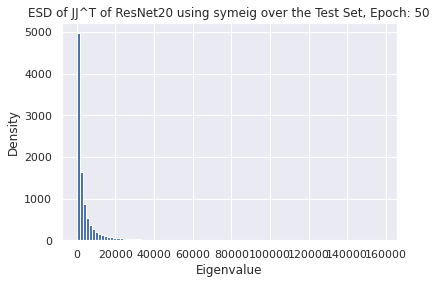

Epoch: 051/200
Train ACC: 98.97
Epoch: 052/200 | Batch 000/100 | Cost: 0.0399
Epoch: 052/200
Train ACC: 99.46
Epoch: 053/200 | Batch 000/100 | Cost: 0.0289
Epoch: 053/200
Train ACC: 99.66
Epoch: 054/200 | Batch 000/100 | Cost: 0.0239
Epoch: 054/200
Train ACC: 99.79
Epoch: 055/200 | Batch 000/100 | Cost: 0.0209
Epoch: 055/200
Train ACC: 99.84
Epoch: 056/200 | Batch 000/100 | Cost: 0.0188
Epoch: 056/200
Train ACC: 99.90
Epoch: 057/200 | Batch 000/100 | Cost: 0.0172
Epoch: 057/200
Train ACC: 99.93
Epoch: 058/200 | Batch 000/100 | Cost: 0.0159
Epoch: 058/200
Train ACC: 99.94
Epoch: 059/200 | Batch 000/100 | Cost: 0.0148
Epoch: 059/200
Train ACC: 99.95
Epoch: 060/200 | Batch 000/100 | Cost: 0.0139
Epoch: 060/200
Train ACC: 99.96
Epoch: 061/200 | Batch 000/100 | Cost: 0.0132


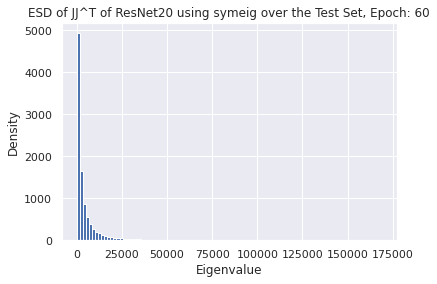

Epoch: 061/200
Train ACC: 99.97
Epoch: 062/200 | Batch 000/100 | Cost: 0.0125
Epoch: 062/200
Train ACC: 99.97
Epoch: 063/200 | Batch 000/100 | Cost: 0.0119
Epoch: 063/200
Train ACC: 99.98
Epoch: 064/200 | Batch 000/100 | Cost: 0.0113
Epoch: 064/200
Train ACC: 99.98
Epoch: 065/200 | Batch 000/100 | Cost: 0.0108
Epoch: 065/200
Train ACC: 99.99
Epoch: 066/200 | Batch 000/100 | Cost: 0.0104
Epoch: 066/200
Train ACC: 99.99
Epoch: 067/200 | Batch 000/100 | Cost: 0.0100
Epoch: 067/200
Train ACC: 99.99
Epoch: 068/200 | Batch 000/100 | Cost: 0.0096
Epoch: 068/200
Train ACC: 99.99
Epoch: 069/200 | Batch 000/100 | Cost: 0.0093
Epoch: 069/200
Train ACC: 99.99
Epoch: 070/200 | Batch 000/100 | Cost: 0.0090
Epoch: 070/200
Train ACC: 99.99
Epoch: 071/200 | Batch 000/100 | Cost: 0.0087


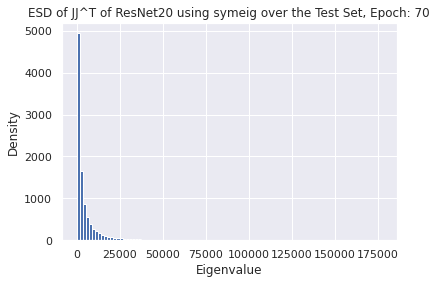

Epoch: 071/200
Train ACC: 99.99
Epoch: 072/200 | Batch 000/100 | Cost: 0.0084
Epoch: 072/200
Train ACC: 99.99
Epoch: 073/200 | Batch 000/100 | Cost: 0.0082
Epoch: 073/200
Train ACC: 99.99
Epoch: 074/200 | Batch 000/100 | Cost: 0.0080
Epoch: 074/200
Train ACC: 99.99
Epoch: 075/200 | Batch 000/100 | Cost: 0.0077
Epoch: 075/200
Train ACC: 99.99
Epoch: 076/200 | Batch 000/100 | Cost: 0.0075
Epoch: 076/200
Train ACC: 99.99
Epoch: 077/200 | Batch 000/100 | Cost: 0.0073
Epoch: 077/200
Train ACC: 99.99
Epoch: 078/200 | Batch 000/100 | Cost: 0.0072
Epoch: 078/200
Train ACC: 99.99
Epoch: 079/200 | Batch 000/100 | Cost: 0.0070
Epoch: 079/200
Train ACC: 99.99
Epoch: 080/200 | Batch 000/100 | Cost: 0.0068
Epoch: 080/200
Train ACC: 99.99
Epoch: 081/200 | Batch 000/100 | Cost: 0.0067


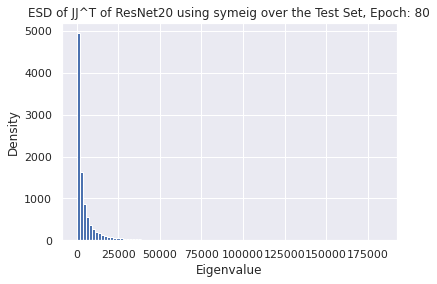

Epoch: 081/200
Train ACC: 99.99
Epoch: 082/200 | Batch 000/100 | Cost: 0.0065


KeyboardInterrupt: ignored

In [10]:
import seaborn as sns
sns.set()

criterion = nn.CrossEntropyLoss()

cost_list = []
train_acc_list = []


epoch_max = 200

for epoch in range(epoch_max):
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
    # compute output
      features, targets = features.to("cuda:0"), targets.to("cuda:0")

      output = model(features)
      loss = criterion(output, targets)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      cost_list.append(loss.item())
      if not batch_idx % 150:
        print (f'Epoch: {epoch+1:03d}/{epoch_max:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {loss:.4f}')
    if epoch % 10 == 0:
      model.eval()
      full_J = construct_diagJ(model, test_loader, batch_size=100, device='cuda:0') # The P100 on Colab should have enough memory to do this
      M = full_J @ full_J.t() 
      del full_J
      u, v = torch.symeig(M)
      del M
      plt.hist(u.cpu().numpy(), bins=100)
      plt.title("ESD of JJ^T of ResNet20 using symeig over the Test Set, Epoch: " + str(epoch)) 
      plt.xlabel("Eigenvalue")
      plt.ylabel("Density")
      plt.show()

    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        
        train_acc = compute_acc(model, train_loader, device)        
        print(f'Epoch: {epoch+1:03d}/{epoch_max:03d}\n'
              f'Train ACC: {train_acc:.2f}')
        
        train_acc_list.append(train_acc)
        #if np.isclose(train_acc, 0.0):
          #torch.save(model.state_dict(), 'MLP_truelabels_randomseed1')
          #pass
    scheduler.step()

#np.save('cost_MLP_truelabels_randomseed1', cost_list)
#np.save('trainacc_MLP_truelabels_randomseed1', train_acc_list)

 

In [12]:
test_acc = compute_acc(model, test_loader,device)        
print(f'Test ACC: {test_acc:.2f}')

Test ACC: 69.87
